## Physical processes shaping evolution of stars and gas in galaxies

### Andrey Kravtsov

#### The University of Chicago 

#### email: kravtsov@uchicago.edu

### Lecture 4. Physical processes driving evolution of galaxies: 

### injection of energy and momentum by young massive stars and active galactic nuclei (AGN)

<br>
<center>
<img width="1000" align="center" src="img/agertz_sim_winds.png"></img>
</center>


In [3]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from codes.plot_utils import plot_pretty
plot_pretty()

### Cooling time as a function of halo mass: three regimes of fast and slow cooling

In the figure below cooling/heating time is estimated as a function of halo mass is estimated at the gas density corresponding to the baryon density of $\Delta\bar{\rho}_{\rm b}$ where $\Delta=200$ is density contrast relative to the mean density of baryons.
$$
t_{\rm cool}=\frac{e}{\dot{e}}=\frac{nkT}{(\gamma-1)n^2\vert H-\Lambda\vert}=\frac{\mu m_p}{(\gamma-1)n_{\Delta}\vert H-\Lambda\vert}\frac{GM_\Delta}{R_\Delta},
$$

<center>
<img src="img/tcool_M200.png" align="center" width="700"></img>
</center>

The figure shows that there is a characteristic mass scale of $<10^{12}\, M_\odot$, below which the cooling time is much smaller than the age of the universe for objects of total mass, but above which $t_{\rm cool}$ becomes longer than the age of the universe. There is also a third regime at $M<5\times 10^9\, M_\odot$, where heating is stronger than cooling. 

Thus, gas in the outskirts of halos of $5\times 10^9\, M_\odot<M<2\times 10^{12}\, M_\odot$ should cool efficiently and such objects cannot maintain gaseous halos. Outside this range, low-mass and high-mass halos cannot cool efficiently. In small mass halos accretion may be shut down completely, while in massive halos accreted gas can be deposited into hot halo, from which it will accrete onto the galaxy with a long time scale. 

### Development of a hot halo during formation of a Milky Way scale galaxy at $z=3.4$

Gas temperature in a "zoom-in" simulation of a Milky Way scale progenitor from <a href="http://adsabs.harvard.edu/abs/2015ApJ...804...18A">Agertz & Kravtsov (2015)</a>. At this epoch, the object reached mass of $>5\times 10^{11}\, M_\odot$ and started to develop a hot gaseous halo. 

<center>
<img src="img/agertz_weak_feedback_z3_4.PNG" align="center" width="1200"></img>
</center>

### In massive halos, $M>10^{12}\, M_\odot$, cooling time of low-density gas is long

So any gas that is heated while at low density can stay hot for extended periods of time forming a hot halo. Cooling time thus introduces another mass scale, $M_{\rm hot}\approx 10^{12}\, M_\odot$ into the galaxy formation problem. 

We can try to implement suppression of gas accretion onto interstellar medium in halos more massive than the characteristic mass of $M_{\rm hot}=10^{12}\, M_\odot$ using a similar "smooth" step function as for accretion suppression due to UV/X-ray heating, but now modifying it to suppress accretion above a certain mass, not below: 

$$
 f_{\rm b, in}(M,z)=1-\left\{1+(2^{\alpha/3-1}-1)\left[\frac{M}{M_{\rm hot}}\right]^{-\alpha}\right\}^{-3/\alpha},
$$

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$


In [4]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
wmap_bolshoi_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.0469, 'sigma8': 0.82, 'ns': 0.95}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('wmap_bolshoi_cosmo', wmap_bolshoi_cosmo)
cosmo.interpolation = True


In [5]:
# define grid of redshifts at which to compute evolution model values
zmax=20.; zmin=0.; nzb = 100
zg = np.linspace(zmax, zmin, nzb) # grid of redshifts
t_output = cosmo.age(zg) # and corresponding times

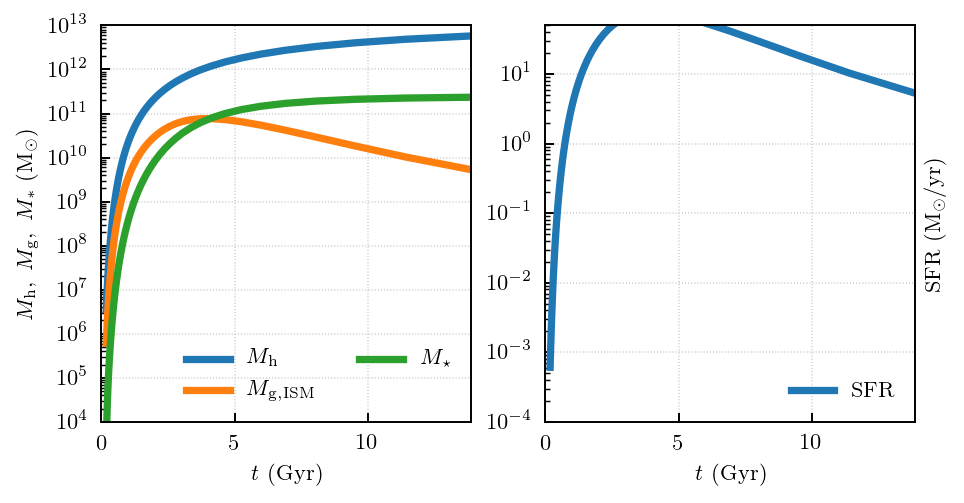

In [20]:
import codes.galaxy_model as gm

Minit = 2.2e6

kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 1}

t_output, Mout = gm.model_with_mhot.test_galaxy_evolution(gmodel=gm.model_with_mhot, Minit=Minit, t_output=t_output,  
                                                                 kwargs=kwargs)
gm.model_with_mhot.plot_test_evolution(Mout, gmodel=gm.model_with_mhot, t_output=t_output, 
                                      kwargs=kwargs, savefig=None)

evolving mass grid...
done.


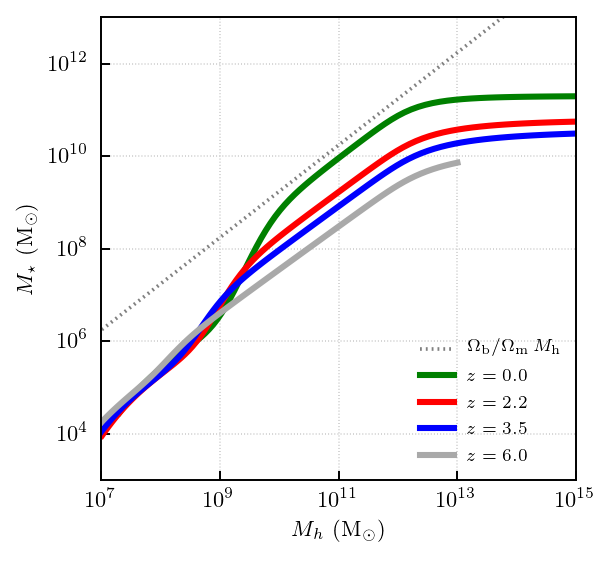

In [14]:
lMmin = 4.5; lMmax = 7.5; Nmb = 100
lMh = np.linspace(lMmin, lMmax, Nmb)

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.model_with_mhot, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)

gm.plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=False)

###  However, hydro$+N-$ body cosmological simulations of galaxy formation 

that include cooling and heating processes considered here and all of the complexities of graviational collapse do not show such sharp break in the $M_\star-M$ relation at large masses. In fact, they produce $M_\star-M$ relation not too different from our simplest model! ***Why?***

<br>
<center>
<img width="900" align="center" src="img/msmh_sims_linear.png"></img>
</center>

### These simulations do not include effects of feedback from Active Galactic Nuclei (AGN), SNIa, and AGB stars

AGNs in massive galaxies are observed to inject jets and inflate bubbles filled with hot, X-ray emitting gas and cosmic rays into surrounding halo (see <a href="https://ui.adsabs.harvard.edu/abs/2012NJPh...14e5023M/abstract">McNamara & Nulsen 2012</a> for a review). They are thought to be responsible for prevening cooling in the inner hot halo, once hot halo forms. 

***How these processes operate in real galaxies is not yet understood in detail.*** Lots of research is being done to understand how to model AGN feedback and its effects on evolution of galaxies (e.g., see <a href="https://ui.adsabs.harvard.edu/abs/2019MNRAS.483.3336T/abstract">Tremmel et al. 2019</a> and references therein).


<center>
<img src="img/cenA_multi_l.jpg" align="center" width="700"></img>
</center>



### A recent example is a FABLE simulation suite with AGN feedback

by <a href="https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.5385H/abstract">Henden et al. 2018</a>

<center>
<img src="img/msm500_henden_etal18.png" align="center" width="700"></img>
</center>


### To summarize...

It is current understanding is that suppression of gas accretion, star formation (and hence growth of stellar mass) in halos of mass $>10^{12}\, M_\odot$ is due to two factors:

* slow cooling of gas at low densities, which allows these objects to maintain a certain gas mass in extended, low-density gaseous halos

* AGN feedback and feedback from supernovae type Ia and AGB stars that heat denser gas near the centers of galaxies, preventing from cooling and forming a cooling flow onto halo center.


However, these processes do not explain the issues with galaxy formation models at $M\leq 10^{12}\, M_\odot$...

### Resulting $M_\star-M_{\rm halo}$ looks like this

It looks incorrect at large masses, but it's actually ok, because we don't model stellar mass growth due to mergers in this simple model, but most stellar mass in massive galaxies is thought to be brought in through such mergers. At $M\leq 10^{12}\, M_\odot$ it is still very far from the relation obtained for observed galaxies.


In [ ]:
lMmin = 4.5; lMmax = 7.5; Nmb = 100
lMh = np.linspace(lMmin, lMmax, Nmb)

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.model_with_mhot, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)

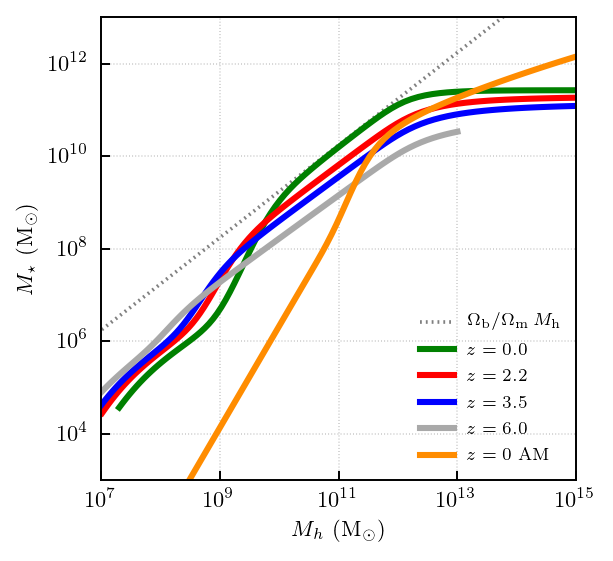

In [22]:
gm.plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)

### It turns out that the main missing ingredient in our model is feedback from young massive stars

When galaxies form new stars, a fraction of them forms in massive stars. Such stars inject large amounts of momentum and energy into surrounding ISM as they drive winds due to intense radiation and as they explode as supernovae. So much momentum and energy cn be injected into the ISM that gas may become unbound and driven out of the galaxy in an **outflow** or **wind**. 

M82 galaxy in multi-wavelength observations:

<br>
<center>
<img src="img/m82_multil.png" align="center" width="500"></img>
</center>


### Wind outflows

Physical processes that drive winds is a subject of active ongoing research and are not understood in detail. . 
However, we know now that winds do arise when we include energy and momentum injection (+cosmic rays) from young stars consistent with expectations from the models of stellar populations. 

Simulations and basic considerations also give us some idea of how winds should arise and how they should scale with halo/galaxy properties.

First, because winds are driven by young stars the rate should be a function of star formation rate. The simplest model: 

$$\dot{M}_{\rm g,out} = \eta \dot{M}_\star.$$

We can then include outflows in our simple galaxy formation model by including a term into ODE for evolution of ISM gas mass:

$$
\dot{M}_{\rm g}=f_{\rm b,uni} f_{\rm g,in}\,\dot{M} - (1-\mathcal{R})\dot{M}_{\star} - \eta\,\dot{M}_\star. $$


### Calibration of mass loading factor in galaxy formation simulations

Recent simulations of galaxy formation have started to calibrate the mass loading factor $\eta$. In particular, <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015)</a> report that the loading factor has simple scaling with stellar mass in their simulations: 

$$\eta=3.6\,M_{\star,10}^{-0.35}$$

where $M_{\star,10}$ is galaxy current stellar mass in units of $10^{10}\ M_\odot$. 

In [61]:
lMmin = 4.5; lMmax = 7.5; Nmb = 100
lMh = np.linspace(lMmin, lMmax, Nmb)
kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 2, 
          'windmodel': 'powerlaw', 'etawind': 3.6, 'alfawind': -0.45}

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.model_with_wind, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)

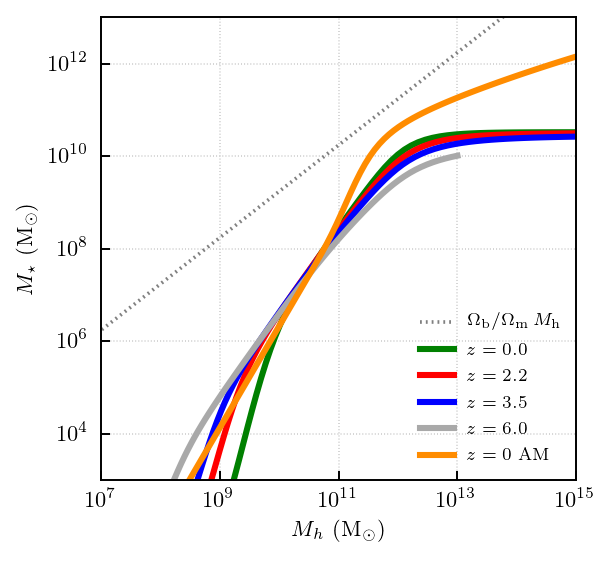

In [62]:
gm.plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)

### Refining the model...

A more recent study by   <a href="https://ui.adsabs.harvard.edu/abs/2017MNRAS.470.4698A/abstract">Angles-Alcazar et al. (2017)</a> shows that $\eta$ does not continue as a power law to large halo masses but drops quickly at $M_{\rm halo} \geq 5\times 10^{11}\ M_\odot$, the behavior that can be approximated by 

$$\eta=\max(0,\ 3.6\,M_{*,10}^{-0.35}-2.5).$$


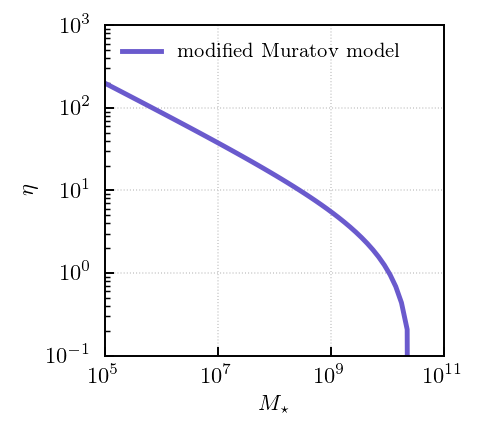

In [60]:
lm = np.linspace(5., 15., 100)
ms = 10.**lm

eta = np.maximum(1.e-20, 3.6*(ms/1.e10)**(-0.35)-2.5)

plt.figure(figsize=(2.5,2.5))
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r'$M_\star$'); plt.ylabel(r'$\eta$')
plt.xlim(1.e5,1e11); plt.ylim(1.e-1, 1.e3)
plt.plot(ms, eta,  c='slateblue', lw=2.0, label=r'$\mathrm{modified\ Muratov\ model}$')

plt.grid(linestyle='dotted', c='lightgray')
plt.legend(frameon=False, loc='upper left', fontsize=8)
plt.show()

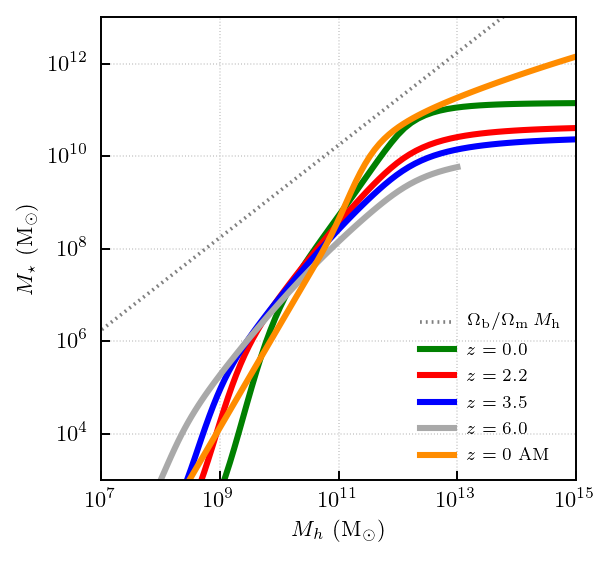

In [46]:
kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5, 
          'windmodel': 'Muratov15mod', 'etawind': 3.6, 'alfawind': -0.4}

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.model_with_wind, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
gm.plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)

### Note that 

Model with winds not only produces the $M_\star-M_{\rm halo}$ relation that is much close to that derived for observed galaxies, but also predicts that it should not evolve much with redshift at small masses.


This is indeed what current estimates of the evolution of $M_\star-M$ relation show (e.g., Behroozi et al. 2013).

<center>
<img width="900" align="center" src="img/msmh_fs_obs_evo.png"></img>
</center>


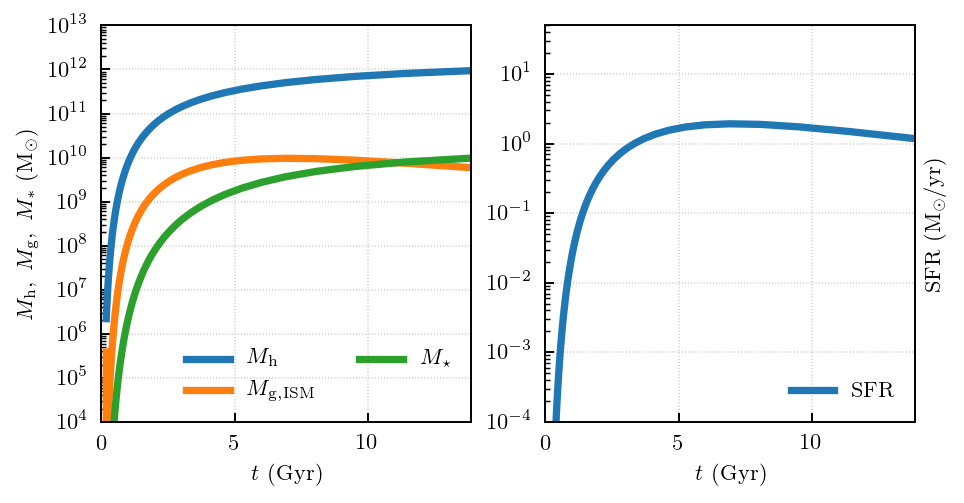

In [73]:
Minit = 2.2e6
kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5, 
          'windmodel': 'powerlaw', 'etawind': 3.6, 'alfawind': -0.45}


t_output, Mout = gm.model_with_mhot.test_galaxy_evolution(gmodel=gm.model_with_wind, Minit=Minit, t_output=t_output,  
                                                                 kwargs=kwargs)
gm.model_with_mhot.plot_test_evolution(Mout, gmodel=gm.model_with_wind, t_output=t_output, 
                                      kwargs=kwargs, savefig=None)

### Success of the model is not limited to star formation rate and stellar masses. 

If we introduce another equation to track mass of heavy elements accreted from IGM, produced by stars, and removed by winds ($y_Z\approx 0.07$ here is the yield of heavy elements by young stars, based on stellar population synthesis observations):

$$\dot{M}_{\rm Z}=Z_{\rm IGM}\dot{M}_{\rm g,acc} + y_{\rm Z}(1-\mathcal{R})\dot{M}_{\star} - \eta\,\frac{M_{\rm Z}}{M_{\rm g,ISM}}\, \dot{M}_\star.$$

Comparison of model predictions for $Z-M_\star$ relation with assumptions about the winds to data is rather striking...

<center>
<img width="1400" align="center" src="img/ZMs_models_vs_obs.png"></img>
</center>

### Understanding the wind outflows scaling: energy-driven wind model

Although $\eta =3.6M_{*,10}^{-0.35}$ is a fit to simulation results, we can understand its basic scaling as follows.

The rate with which young stars inject energy into ISM is $\dot{E}_{\rm SN}\propto \dot{M}_\star$. 
Suppose that it is this injected energy that unbinds the gas and drives in an outflow. The assumption that energy injection (as opposed to momentum kicks) drives the gas results in ***energy-driven wind model***. 

Suppose that this energy injection is efficient in unbinding the gas and driving it out, which means that 

$$\dot{E}_{\rm SN}\propto\dot{M}_\star\propto \dot{M}_{\rm g, out}V^2_{\rm out}$$

The outflow velocity, $V_{\rm out}$, will be determined by the mass of ISM gas into which supernova energy is deposited and can fluctuate. However, one can make an argument that when winds are capable of driving the gas out of potential well of the system, *on average* it should be of order of escape velocity, $V_{\rm esc}=\sqrt{-2\Phi}=\sqrt{2} V_{\rm circ}\propto M_{\rm h}/R_{\rm h}$, i.e. 

$$\dot{E}_{\rm SN}\propto \dot{M}_{\rm g, out} \frac{M_{\rm h}}{R_{\rm h}}\propto \dot{M}_{\rm g, out}\, M^{2/3}_{\rm h},$$

where we use the fact that mass and radius of the halo are related by definition of the radius: $M_{\rm h}\propto R_h^3$. 

The energy injected by supernova into ISM of galaxies is $E_{\rm SN}\simeq\epsilon_{\rm SN}\nu_{\rm SN} M_\star$ (true for a fixed initial mass function, IMF), where $\epsilon_{\rm SN}$ is the energy per supernova that is transferred to the ISM after radiative losses during expansion stage of the remnant bubbles, $\nu_{\rm SN}$ is the number of supernovae per solar mass of stars, which is $\nu_{\rm SN}\approx 0.01-0.02$ for normal stellar populations. Computer simulations of the supernovae remnants (e.g., <a href="http://adsabs.harvard.edu/abs/2015ApJ...802...99K">Kimm & Ostriker 2015</a>, <a href="http://adsabs.harvard.edu/abs/2015MNRAS.450..504M">Martizzi et al 2015</a>) show that $\epsilon_{\rm SN}\sim 10^{49}$ ergs, i.e., about 1 per cent of the original explosion energy remains after cooling losses.


### Energy-driven wind model cont'd

Why can we assume $V_{\rm out}\sim V_{\rm esc}$ on average? After all, supernovae energy injection does not have to "know" or "respect" the halo binding energy. The main reason is that if energy injection rate is much smaller than binding energy, the gas will accumulate and SFR will increase, while if it is much larger than the binding energy, ISM gas will be driven quickly in the wind. Thus, on average the galaxy should evolve with driving winds with energy close to the halo binding energy. 

With this key assumption we have

$$\eta=\frac{\dot{M}_{\rm g, out}}{\dot{M}_\star}\propto M_{\rm h}^{-2/3}.$$

Likewise, throughout the evolution efficient wind driving implies: $M_\star\propto E_{\rm SN}\simeq M_{\rm g,tot}\,V^2_{\rm out}$, where $M_{\rm g,tot}\propto M_{\rm h}$ is the gas mass that was accreted onto galaxy throughout its evolution. 

Thus, 

$$M_\star\propto M_{\rm h}V^2_{\rm out}\propto M_{\rm h}\frac{M_{\rm h}}{R_{\rm h}}\propto M_{\rm h}\,M_{\rm h}^{2/3}\propto M_{\rm h}^{5/3}$$

and so the mass loading factor should scale as 

$$\eta\propto M_{\rm h}^{-2/3}\propto M_\star^{-2/5}\propto M_\star^{-0.4},$$

which is quite close to the scaling $\eta\propto M_{\star}^{-0.35}$ measured in simulations by <a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015).</a> 

Given that this scaling was derived assuming that feedback imparts *energy* required for unbinding the gas (this energy can be in the form of kinetic energy or thermal energy - the form of energy does not matter), the scaling is called *the energy-driven wind solution.*

### Momentum-driven wind model

We can use a similar argument, but assume that gas escapes because it acquired momentum (injected by young stars via winds and supernova remnants) that corresponds to velocity larger than escape velocity from the potential: 

$$\dot{p}_{\rm SN}\propto\dot{M}_\star\propto \dot{M}_{\rm g, out}V\propto \dot{M}_{\rm g, out} \left(\frac{M_{\rm h}}{R_{\rm h}}\right)^{1/2}\propto \dot{M}_{\rm g, out}\, M^{1/3}_{\rm h},$$

where $V$ is now escape velocity, $V=\sqrt{-2\Phi}=\sqrt{2GM/R}$, which measures the depth of the potential out of which gas has to climb out, and $M_{\rm h}\propto R_h^3$ are the halo mass and radius. Thus, 

$$\eta=\frac{\dot{M}_{\rm g, out}}{\dot{M}_\star}\propto M_{\rm h}^{-1/3}.$$

Likewise, throughout the evolution efficient wind driving implies: $M_\star\propto p_{\rm SN}\simeq M_{\rm g}\,V$, where $M_{\rm g}\propto M_{\rm h}$ is the gas mass that was accreted onto galaxy throughout its evolution. 

Then, $\chi=M_\star/M_{\rm g}\propto V\propto \sqrt{M_{\rm h}/R_{\rm h}}\propto M^{1/3}_{\rm h}\propto \chi^{-1/3}M_\star^{1/3}$ and thus $\chi\propto M_\star^{1/4}$. The relation between stellar mass and halo mass is thus:
$$
M_\star\propto M^{4/3}\propto M^{1.33}.
$$
and so the mass loading factor should scale as 

$$\eta\propto M_{\rm h}^{-1/3}\propto M_\star^{-1/4}\propto M_\star^{-0.25},$$

i.e., shallower than in the energy-driven wind model. 

###  Huge recent progress in ability to model feedback and winds in simulations of galaxy formation  

Which resulted in reproducing $M_\star-M_{\rm halo}$ relation indicated by the observed shape of stellar mass function

<br>
<center>
<img width="1400" align="center" src="img/msmh_recent_sims.png"></img>
</center>


### This success is due to extremely violent winds in small-mass halos

Temperature distribution around forming small-mass halos at $z=4.7$.

<center>
<img width="1000" align="center" src="img/agertz_sim_winds.png"></img>
</center>


### Recent simulations are quite good at reproducing diversity of observed galaxy morphologies

Even though they were not tuned to do this... This also turns out to be true for many other galaxy properties (sizes, gas content, metallicity, etc...)

<center>
<img width="1100" align="center" src="img/recent_sims_morphologies.png"></img>
</center>


### Overall, great progress in galaxy formation modelling in the last ~6-7 years

See reviews by <a href="">Dave & Somerville (2015)</a>, <a href="https://ui.adsabs.harvard.edu/abs/2017ARA%26A..55...59N/abstract">Naab & Ostriker (2017)</a>.


### An incomplete list of remaining challenges and areas of active research

* Understanding physical processes via which stellar and AGN feedback affects gas and launches outflows. Effect of radiation transfer, radiation pressure, and cosmic rays is being actively explored now. 

* Understanding how effects of feedback affect various galaxy properties.

* Understanding how effects of feedback affect distribution of dark matter in galaxies.

* Understanding how possible deviations from assumptions of CDM affect properties of galaxies (e.g., self-interacting dark matter models). 

### Summary: take away points

Simulations and phenomenological models over the past 20+ years showed that the following processes are critical for formation of galaxies with properties similar to observed ones:

* Cooling of gas: it allows gas to dissipate the kinetic energy it acquires during collapse, sink to the center of the halo and form stars.

* Heating: heating by UV and X-ray radiation mediates temperature of intergalactic has and can suppress accretion of gas onto galaxies in halos $\geq 10^9-10^{10}\ M_\odot$ (e.g., it probably strongly affects properties of dwarf satellites of the Milky Way and Andromeda galaxies.

### Summary: take away points

* Dynamical heating by shocks during collapse can heat the gas to high temperatures. In halos of $M\leq  10^{12}\ M_\odot$ this energy is quickly radiated away and gas free-falls onto central galaxies. In halos of larger mass cooling becomes too slow and such halos can maintain hot gaseous halos around central galaxies.

* Feedback by AGNs and evolved stars (SN Ia and AGB)  is thought to prevent gas from cooling in the inner regions of such hot gaseous halos, where gas density is larger. This feedback prevents gas accretion in massive systems, which suppresses star formation and makes these galaxies "red and dead" at low $z$. 

* Energy and momentum injection by young massive stars (stellar feedback) is *critical* for producing galaxies with realistic properties. It shapes them by driving outflows, which become progressively more efficient in halos of smaller mass. 

### Processes most relevant for galaxy formation 

* ***Cooling:*** without cooling gas would not lose the kinetic energy acquired during collapse and would not reach ISM and densities required to form stars


* ***Heating processes:*** (both before accretion onto galaxy and after) are important in suppressing gas accretion in small objects and formation of hot gaseous halos in massive objects.


* ***Star formation:*** without star formation there would be no galaxies as we know them. 


* ***Injection of energy and momentum by massive stars and supermassive black holes (feedback):*** recent simulations and models show that without feedback we cannot explain observed stellar masses and many other properties of galaxies (morphologies, sizes, etc...). 

## Thank you for your attention



In [75]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.3, 'Ob0': 0.045714, 'sigma8': 0.81, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

In [76]:
import codes.galaxy_model as gm

from scipy.interpolate import interp2d
from scipy.integrate import odeint

In [77]:
# define grid of redshifts at which to compute evolution model values
zmax=20.; zmin=0.; nzb = 100
zg = np.linspace(zmax, zmin, nzb) # grid of redshifts
t_output = cosmo.age(zg) # and corresponding times

First, run model with no winds ($\eta_w=0$).

In [94]:

# setup dictionary of parameters to pass to the model
Zsun = 0.02
Z_IGM = 2.e-3*Zsun
tausf = 5.
kwargs = {'cosmo': cosmo, 'Z_IGM': Z_IGM, 'sfrmodel': 'gaslinear', 'tausf': tausf, 
          'windmodel': 'powerlaw', 'etawind': 0., 'alfawind': 0.}

We will save the grids of halo mass, gas mass, stellar mass, and heavy element mass in arrays with different name for each model. 

In [79]:
lMmin = 4.5; lMmax = 7.5; Nmb = 100
lMh = np.linspace(lMmin, lMmax, Nmb)

lMhnw, lMgnw, lMsnw, lMZnw = gm.model_with_metals.compute_mass_grid(gmodel = gm.model_with_metals, lMhig=lMh, 
                                                                  t_output=t_output, kwargs=kwargs)


Model with the above processes and wind modelling (see <a href="l05_galaxy_formation.ipynb">lecture 5 notebook</a>).

The mass loading factor of the wind is modeled as

$$\eta \equiv\frac{\dot{M}_{\rm g,out}}{\dot{M}_\star} = \eta_{\rm wind}\,\left(\frac{M_\star}{10^{10}\ M_\odot}\right)^{\alpha_{\rm wind}}.$$

The model below sets $\alpha_{\rm wind}=0$, which eliminates dependence of wind mass loading factor $\eta$ on stellar mass. It is thus, models wind with constant $\eta$ that is specified in the dictionary below.  

In [80]:
kwargs = {'windmodel': 'powerlaw', 'etawind': 3.6, 'alfawind': 0.0, 'cosmo': cosmo, 
          'Z_IGM': Z_IGM, 'sfrmodel': 'gaslinear', 'tausf': tausf}
lMhcw, lMgcw, lMscw, lMZcw = gm.model_with_metals.compute_mass_grid(gmodel = gm.model_with_metals, lMhig=lMh, 
                                                                  t_output=t_output, kwargs=kwargs)

Next we run a model with the same power law parameterization of $\eta$ as above, but with parameters $\eta_{\rm wind}=3.6$ and $\alpha_{\rm wind}=-0.35$ measured in galaxy formation simulations by
<a href="http://adsabs.harvard.edu/abs/2015MNRAS.454.2691M">Muratov et al. (2015)</a>.

In [95]:
kwargs = {'windmodel': 'powerlaw', 'etawind': 3.6, 'alfawind': -0.4, 
          'cosmo': cosmo, 'Z_IGM': Z_IGM, 'sfrmodel': 'gaslinear', 'tausf': tausf}
lMhm15w, lMgm15w, lMsm15w, lMZm15w = gm.model_with_metals.compute_mass_grid(gmodel = gm.model_with_metals, lMhig=lMh, 
                                                                  t_output=t_output, kwargs=kwargs)


Now results can be plotted. 

Routines below are set up to plot comparison of model predictions for galaxy metallicity and its stellar mass with observational measurements of these for nearby dwarf galaxies from samples of <a href="https://ui.adsabs.harvard.edu/abs/2006ApJ...647..970L/abstract">Lee et al. (2006)</a> and <a href="https://ui.adsabs.harvard.edu/abs/2013ApJ...779..102K/abstract">Kirby et al. (2013)</a> and for more massive galaxies at three different redshifts, as reported by <a href="https://ui.adsabs.harvard.edu/abs/2008ASPC..396..409M/abstract">Maiolino et al. (2008).</a> 

In [98]:
#
# plot observational trend from Maiolino
OHsol = 9.
    
def Zmaiolino08(lMs,lM0,K0):
    """
    best fit relation from table in Maiolino et al. 2008 using consistent Z calibration
    """
    return -0.0864*(lMs-lM0)**2 + K0


def plot_ZMs_data(ax, savefig=None):
    zcolors = ['mediumorchid', 'red', 'blue', 'darkgray']
    zmaio = np.array([0.07,  2.2, 3.5])
    lM0 = np.array([11.8, 12.38, 12.76])
    K0 = np.array([9.04, 8.99, 8.79])
    nzplot = 3

    lMs = np.arange(9.0, 11.0, 0.1)
    for i, zm in enumerate(zmaio[:nzplot]): 
        Zmaio = Zmaiolino08(lMs, lM0[i], K0[i]) - OHsol + 0.1
        ax.plot(10.**lMs, 10.**Zmaio, '--', c=zcolors[i], lw=3.0, label=r'${\rm M08}, z=%.1f$'%zm)

    # plot Lee et al. 2006
    lMsL = np.linspace(5.5, 9.5, 100)
    lZLp, elZLp, lMsLp = np.loadtxt('data/lee06.txt',usecols=(1,3,4),unpack=True)
    lZLp = lZLp - OHsol
    ax.scatter(10**lMsLp,10.**lZLp, s=30, marker='o', c='slateblue', 
               edgecolor='darkslateblue', label=r'$\rm Lee\ et\ al.\ 06$')
    # data from Kirby et al. 2013
    lLVk, elLVk, lZk, elZk  = np.loadtxt('data/kirby13_tab4.txt',usecols=(4,5,6,7),unpack=True)
    ax.scatter(10**lLVk, 10.**lZk, s=35, marker='p', c='mediumpurple',
               edgecolor='darkslateblue', label=r'$\rm Kirby\ et al.\ 13$')

def plot_MsZ_model_obs(lMsiarr, lMigarr, lMZiarr, 
                       xlims=[1.e3, 3.e11], ylims=[1.e-3, 20.], 
                       zplot=0, titles=r'$z=0$', savefig=None):
    fig,ax = plt.subplots(1,3, figsize=(9, 3))

    Zsun = 0.018
    for ip, axd in enumerate(ax):
        axd.set_xlabel(r'$M_*\ \rm (M_\odot)$')
        if ip == 0:
            axd.set_ylabel(r'$Z/Z_\odot$')
        axd.set_xlim(xlims); axd.set_ylim(ylims)
        axd.set_xscale('log'); axd.set_yscale('log')
        lMsi = lMsiarr[ip]; 
        lMgi = lMgiarr[ip]; lMZi = lMZiarr[ip]
        plot_ZMs_data(axd)
        for iz, zp in enumerate(zplot): 
            MZz = 10.**lMZi(np.log10(1.0+zp),lMh); Msz = 10.**lMsi(np.log10(1.0+zp),lMh)
            Mgz = 10.**lMgi(np.log10(1.0+zp),lMh)
            axd.plot(Msz, MZz/Mgz/Zsun, c=zcolors[iz], lw=3.0, label=r'$\mathrm{model}\ z=%.1f$'%zp)
        axd.set_title(titles[ip])
        axd.grid(c='lightgray', linestyle='dotted')
        
    plt.legend(frameon=False,loc='upper left', scatterpoints=1, fontsize=6)
    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()



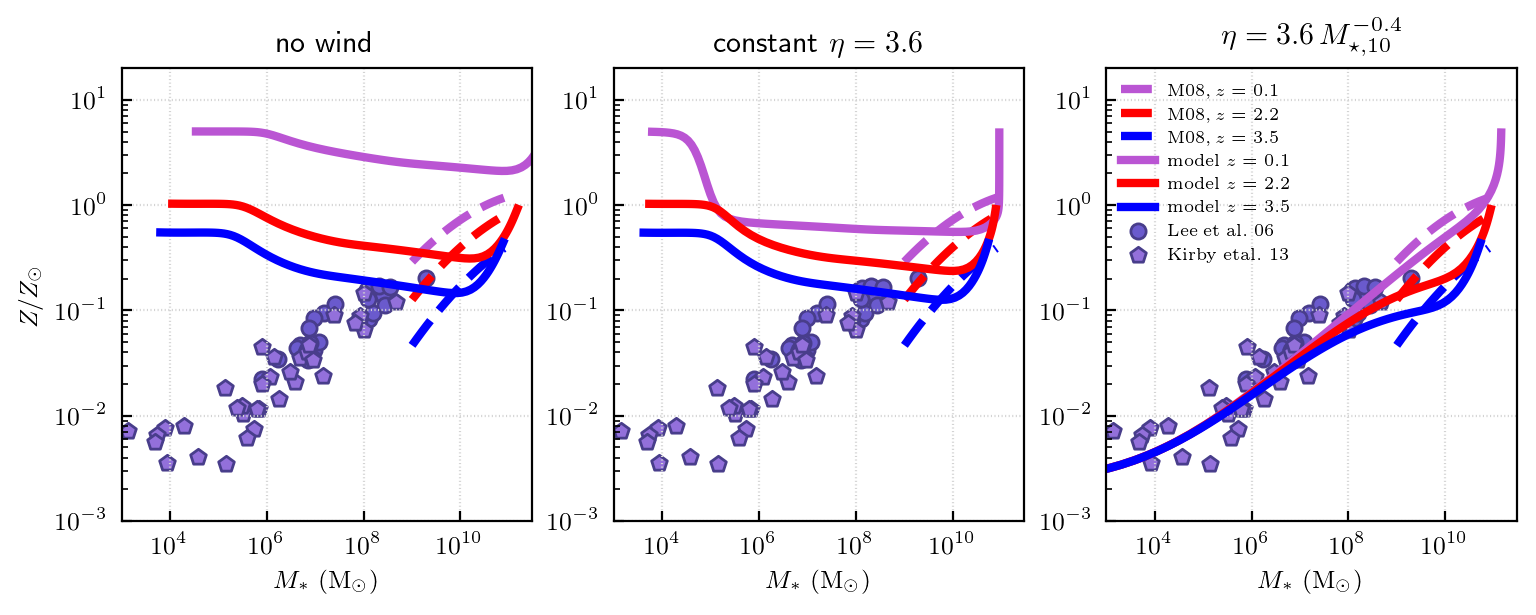

In [99]:
plot_pretty(dpi=200)

lMsiarr = [lMsnw, lMscw, lMsm15w]; lMZiarr = [lMZnw, lMZcw, lMZm15w];
lMgiarr = [lMgnw, lMgcw, lMgm15w];

# these titles are passed on to put a title on top of each panel
titles = ['no wind', 'constant $\eta=3.6$', '$\eta=3.6\, M_{\star,10}^{-0.4}$']

# these arrays define at which redshifts to plot model predictions and which colors to use for lines at these z
zplot = [0.07, 2.2, 3.5];  zcolors = ['mediumorchid', 'red', 'blue', 'darkgray']

# plot
plot_MsZ_model_obs(lMsiarr, lMgiarr, lMZiarr,  zplot=zplot, titles=titles, savefig='img/ZMs_models_vs_obs.png')
